In [1]:
from ecell4 import *
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = GSLRandomNumberGenerator()

In [2]:
simrun =1.
K = 20
duration = 1000
L=1.
D = 0.1
kon = 0.02
koff = 0.1
N = 1
V = L**3
h = L/K
dt = 2.*(h*h)/3./D

In [3]:
def create_model(D,koff,kon): #sturock model
    with species_attributes():
        A | {'D': str(D)}
        B | {'D': '0.'}

    with reaction_rules():
        A + B > B | koff
        ~A > A | kon
    return get_model()

In [4]:
w = meso.MesoscopicWorld(Real3(L,L,L), Integer3(K,K,K))
#w = gillespie.GillespieWorld(Real3(L,L,L))
m = create_model(D,koff,kon)
w.bind_to(m)  # XXX: Point1
w.add_molecules(Species('A'), N)
w.add_molecules(Species('B'), 1)
sim = meso.MesoscopicSimulator(w)
#sim = gillespie.GillespieSimulator(w)

#ensemble_simulations(100, duration, y0={"A": N}, model=m, solver=("gillespie"), volume=Real3(L,L,L))

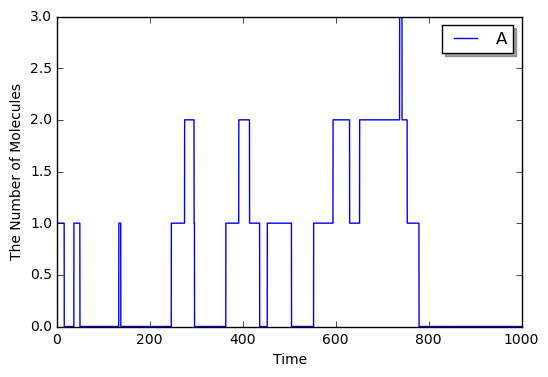

In [5]:
obs = FixedIntervalNumberObserver(dt, ('A'))
sim.run(duration, obs)
viz.plot_number_observer(obs)